# Les équations normales avec Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

# 1. Génération des mêmes données qu'avant

In [3]:
np.random.seed(42)
m = 100
X = 10 * np.random.rand(m)
vrai_theta0 = 4
vrai_theta1 = 3
bruit = np.random.randn(m)
y = vrai_theta0 + vrai_theta1 * X + bruit

# On ajoute la colonne de biais (1) pour le terme constant θ₀
X_biais = np.c_[np.ones((m, 1)), X.reshape(m, 1)]  # forme (m, 2)

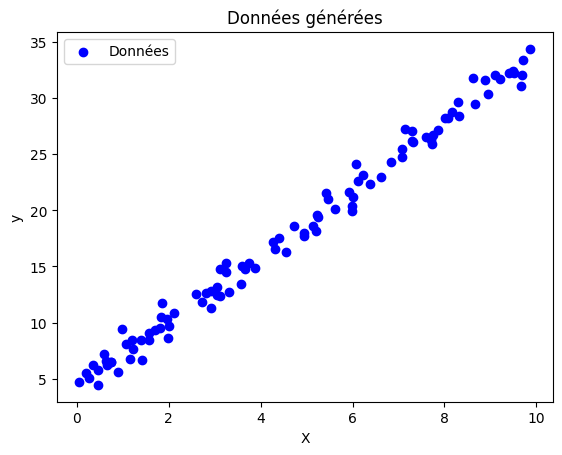

In [4]:
# Visualisation des données
plt.scatter(X, y, color='blue', label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Données générées')
plt.legend()
plt.show()

# 2. Régression linéaire par équations normales

In [5]:
def eq_normales(X, y):
    """
    Calcule θ = (X^T X)^(-1) X^T y
    - X : matrice (m, 2) incluant la colonne de biais
    - y : vecteur (m,)
    Retourne θ (vecteur de taille 2)
    """
    XtX = X.T.dot(X)                # X^T X, matrice (2,2)
    XtX_inv = np.linalg.inv(XtX)    # inversion de la matrice (2,2)
    Xty = X.T.dot(y)                # X^T y, vecteur (2,)
    theta = XtX_inv.dot(Xty)        # multiplication (2,2) × (2,) → (2,)
    return theta


In [7]:
# Calcul des paramètres optimaux par équations normales
theta_eq = eq_normales(X_biais, y)

# 3. Affichage des paramètres trouvés

In [8]:
print("Paramètres par équations normales :")
print(f"θ₀ = {theta_eq[0]:.4f}")
print(f"θ₁ = {theta_eq[1]:.4f}")

Paramètres par équations normales :
θ₀ = 4.2151
θ₁ = 2.9540


# 4. Visualisation : données et droite ajustée

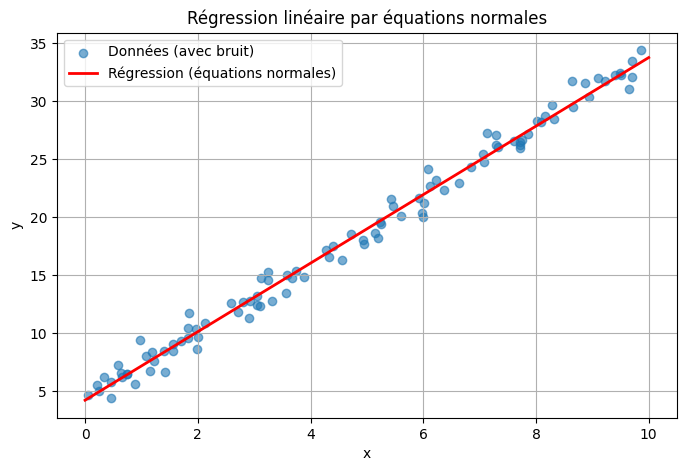

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Données (avec bruit)", alpha=0.6)
x_tracé = np.array([0, 10])
y_tracé = theta_eq[0] + theta_eq[1] * x_tracé
plt.plot(x_tracé, y_tracé, linewidth=2, label="Régression (équations normales)", color='red')
plt.title("Régression linéaire par équations normales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()